# Why would I use Uavsar for snow?

L-band radar imagery penetrates through the snowpack. However when it crosses into the snowpack from the air it refracts at an angle, similar to light entering water. This refraction leads to a phase shift relative to an image with no or less snow. Using this difference in phase between two images we can calculate the change in snow height between flights using:

$$
\Delta d = - \frac{\Delta \phi \lambda}{4 \pi} \frac{1}{\cos^{ } \alpha - \sqrt{\epsilon_{s} - \sin^{2} \alpha}}
$$

Where $\Delta$ d is the change in snow height, $\Delta \phi$ is the phase shift between two SAR images, $\lambda$ is the energy wavelength, $\alpha$ is the incidence angle, and $\epsilon_{s}$ is the dielectric constant of snow which is dependent on the density and liquid water content.

:::{figure-md} conceptualfigure
<img src="../../img/uavsar/conceptual.png" style="background-color:white;" alt="conceptual_fig">

Conceptual diagram of radar refraction across the air-snow interface.
:::



In [4]:
# Database imports
from snowexsql.db import get_db
from snowexsql.data import PointData, ImageData
from snowexsql.conversions import query_to_geopandas

# Uavsar_pytools imports
from uavsar_pytools.snow_depth_inversion import depth_from_phase

# Other imports
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import rioxarray as rxa
import contextily as cx

# February 1st and 13th Uavsar Image Pairs

You learned in the first section how to access and download uavsar imagery. For this section the data has already been downloaded, converted to geoTiffs and cropped down to an area of interest that overlaps the main field sites of Grand Mesa. It is stored in the `gm_mesa` subdirectory of this tutorial. Lets take a look at the coherence and unwrapped phase between these two flights. If you don't remember what these two represent check out the previous section of this tutorial.

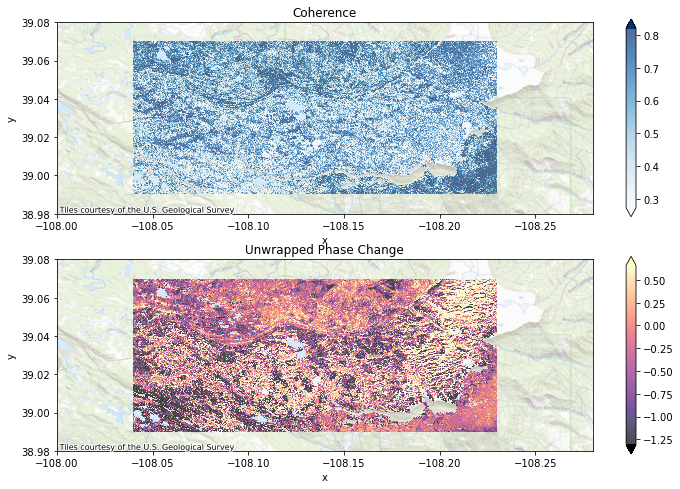

In [24]:
# Create figures and subplots
fig, axes = plt.subplots(2, 1, figsize = (12,8))
# Select colormap for each image type
vis_dic = {'cor': 'Blues', 'unw':'magma'}
# Directory of the uavsar tiffs
gm_dir = 'gm_data'

for i, type in enumerate(vis_dic.keys()):
    ax = axes[i]
    img = rxa.open_rasterio(join('gm_data', f'{type}.tif'))
    vmin, vmax = img.quantile([0.1,0.9])
    im = img.plot(ax = ax, vmin = vmin, vmax = vmax, cmap = vis_dic[type], zorder = 1, alpha = 0.7)
    ax.set_xlim(-108, -108.28)
    ax.set_ylim(38.98, 39.08)
    cx.add_basemap(ax, crs=img.rio.crs, alpha = 0.8, source = cx.providers.USGS.USTopo)
axes[0].set_title('Coherence')
axes[1].set_title('Unwrapped Phase Change')
plt.show()

## Using Database to collection snow depth and lidar datasets

In [ ]:
# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'
# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)